<a href="https://colab.research.google.com/github/krizal-dangol/Final_Assessment_AI/blob/main/2501391_KrizalDangol_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction

### 1.1 Problem Statement
The goal of this project is to predict continuous energy consumption of household appliances measured in Watt-hours (Wh). Accurate prediction of appliance energy usage enables:
- Development of smart home automation systems
- Identification of energy usage patterns
- Optimization of energy distribution
- Reduction of carbon footprint through efficient energy management

### 1.2 Dataset Description
**Dataset Name:** Appliances Energy Prediction  
**Source:** UCI Machine Learning Repository  
**Created by:** Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix (2017)  
**Access:** https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction  

**Dataset Characteristics:**
- **Records:** 19,735 observations
- **Features:** 29 attributes (28 predictors + 1 target)
- **Time Period:** 4.5 months (January 11, 2016 - May 27, 2016)
- **Sampling Rate:** 10-minute intervals
- **Target Variable:** Appliances (energy consumption in Wh)

### Objective
Build and compare regression models to accurately predict appliance energy consumption based on environmental sensors and weather conditions, ultimately identifying the most effective model for this prediction task.

## 2. Data Loading and Initial Exploration

In [181]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [182]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FinalProject/energydata_complete.csv')

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (19735, 29)
Number of Records: 19,735
Number of Features: 29


In [183]:
# Display first few rows
print("\n=== First 5 Rows of Dataset ===")
df.head()


=== First 5 Rows of Dataset ===


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [184]:
# Display dataset information
print("\n=== Dataset Information ===")
df.info()


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         1973

In [185]:
# Display column names and their descriptions
print("\n=== Feature Descriptions ===")
print("\nTarget Variable:")
print("  - Appliances: Energy use by appliances in Wh")
print("\nIndoor Environmental Features:")
print("  - T1-T9: Temperature in different rooms (Celsius)")
print("  - RH_1-RH_9: Humidity in different rooms (%)")
print("  - lights: Energy use by light fixtures (Wh)")
print("\nOutdoor Weather Features:")
print("  - T_out: Outside temperature (Celsius)")
print("  - Press_mm_hg: Atmospheric pressure (mm Hg)")
print("  - RH_out: Outside humidity (%)")
print("  - Windspeed: Wind speed (m/s)")
print("  - Visibility: Visibility (km)")
print("  - Tdewpoint: Dew point temperature (Celsius)")
print("\nOther:")
print("  - date: Timestamp")
print("  - rv1, rv2: Random variables (for testing)")


=== Feature Descriptions ===

Target Variable:
  - Appliances: Energy use by appliances in Wh

Indoor Environmental Features:
  - T1-T9: Temperature in different rooms (Celsius)
  - RH_1-RH_9: Humidity in different rooms (%)
  - lights: Energy use by light fixtures (Wh)

Outdoor Weather Features:
  - T_out: Outside temperature (Celsius)
  - Press_mm_hg: Atmospheric pressure (mm Hg)
  - RH_out: Outside humidity (%)
  - Windspeed: Wind speed (m/s)
  - Visibility: Visibility (km)
  - Tdewpoint: Dew point temperature (Celsius)

Other:
  - date: Timestamp
  - rv1, rv2: Random variables (for testing)


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Quality Assessment

In [186]:
# Check for missing values
print("=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found in the dataset!")
else:
    print(f"\n⚠ Total missing values: {missing_df['Missing Count'].sum()}")

=== Missing Values Analysis ===
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ No missing values found in the dataset!


In [187]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n=== Duplicate Rows ===")
print(f"Number of duplicate rows: {duplicates}")
if duplicates == 0:
    print("✓ No duplicate rows found!")


=== Duplicate Rows ===
Number of duplicate rows: 0
✓ No duplicate rows found!


In [188]:
# Statistical summary of numerical features
print("\n=== Statistical Summary ===")
df.describe().T


=== Statistical Summary ===


,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


### 3.2 Target Variable Analysis

In [189]:
# Analyze target variable (Appliances)
print("=== Target Variable: Appliances Energy Consumption ===")
print(f"Mean: {df['Appliances'].mean():.2f} Wh")
print(f"Median: {df['Appliances'].median():.2f} Wh")
print(f"Std Dev: {df['Appliances'].std():.2f} Wh")
print(f"Min: {df['Appliances'].min():.2f} Wh")
print(f"Max: {df['Appliances'].max():.2f} Wh")
print(f"25th Percentile: {df['Appliances'].quantile(0.25):.2f} Wh")
print(f"75th Percentile: {df['Appliances'].quantile(0.75):.2f} Wh")

=== Target Variable: Appliances Energy Consumption ===
Mean: 97.69 Wh
Median: 60.00 Wh
Std Dev: 102.52 Wh
Min: 10.00 Wh
Max: 1080.00 Wh
25th Percentile: 50.00 Wh
75th Percentile: 100.00 Wh


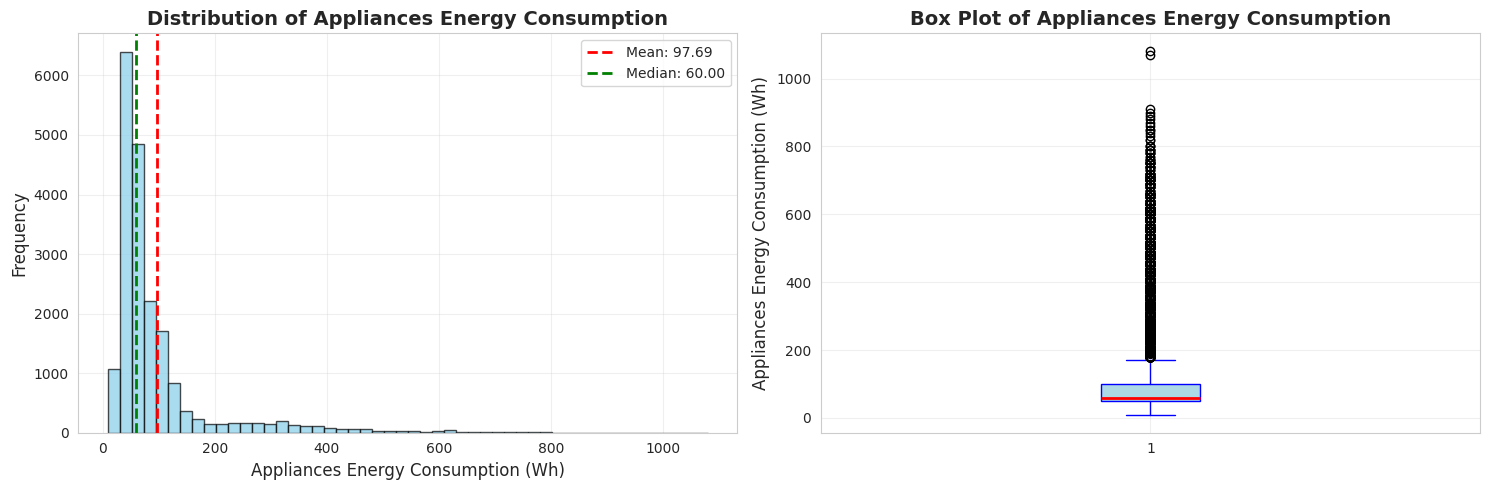


 Interpretation:
- The distribution is RIGHT-SKEWED, with most values concentrated at lower energy consumption.
- This indicates that appliances typically consume low to moderate energy, with occasional spikes.
- The presence of outliers (high consumption values) suggests periodic heavy usage events.
- Mean > Median confirms the right skewness of the distribution.


In [190]:
# Visualization 1: Distribution of Target Variable (Appliances)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Appliances'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Appliances Energy Consumption (Wh)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Appliances Energy Consumption', fontsize=14, fontweight='bold')
axes[0].axvline(df['Appliances'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Appliances"].mean():.2f}')
axes[0].axvline(df['Appliances'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Appliances"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Appliances'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'))
axes[1].set_ylabel('Appliances Energy Consumption (Wh)', fontsize=12)
axes[1].set_title('Box Plot of Appliances Energy Consumption', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- The distribution is RIGHT-SKEWED, with most values concentrated at lower energy consumption.")
print("- This indicates that appliances typically consume low to moderate energy, with occasional spikes.")
print("- The presence of outliers (high consumption values) suggests periodic heavy usage events.")
print("- Mean > Median confirms the right skewness of the distribution.")

### 3.3 Feature Engineering: Temporal Features

In [191]:
# Extract temporal features from date column
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month

print("✓ Temporal features extracted: hour, day_of_week, month")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")

✓ Temporal features extracted: hour, day_of_week, month

Date range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00


### 3.4 Outlier Detection and Analysis

In [192]:
# Detect outliers using IQR method for key features
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("=== Outlier Analysis (IQR Method) ===")
outlier_features = ['Appliances', 'lights', 'T1', 'RH_1', 'T_out']
for col in outlier_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {n_outliers} outliers ({(n_outliers/len(df)*100):.2f}%) | Range: [{lower:.2f}, {upper:.2f}]")

print("\n📌 Note: Outliers are retained as they represent real energy consumption spikes and are valuable for model training.")

=== Outlier Analysis (IQR Method) ===
Appliances: 2138 outliers (10.83%) | Range: [-25.00, 175.00]
lights: 4483 outliers (22.72%) | Range: [0.00, 0.00]
T1: 515 outliers (2.61%) | Range: [18.00, 25.36]
RH_1: 146 outliers (0.74%) | Range: [28.73, 51.67]
T_out: 436 outliers (2.21%) | Range: [-6.45, 20.52]

📌 Note: Outliers are retained as they represent real energy consumption spikes and are valuable for model training.


### 3.5 Correlation Analysis

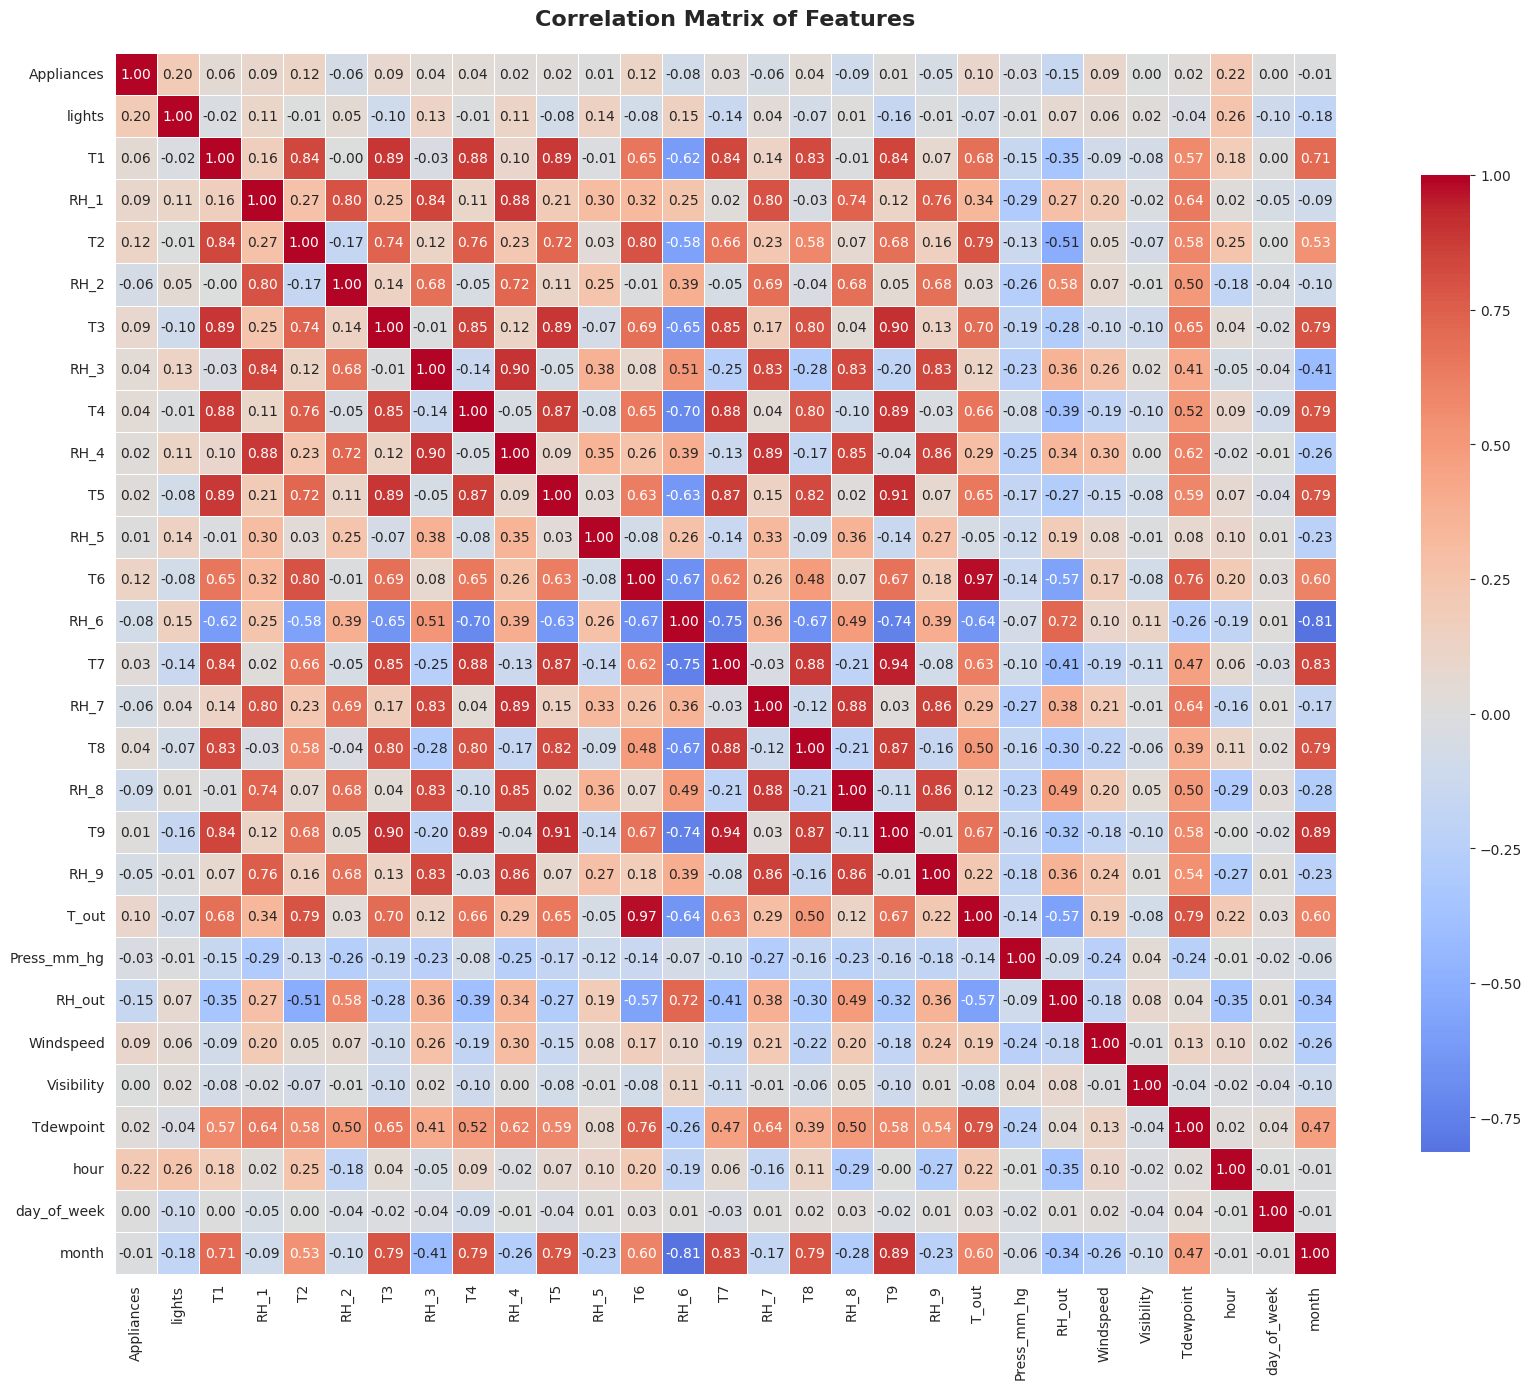


=== Top 10 Features Correlated with Appliances ===
Appliances    1.000000
hour          0.216792
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281

 Interpretation:
- LIGHTS shows the strongest positive correlation with appliance energy consumption.
- Temperature and humidity from different rooms show varying correlations.
- Outdoor weather conditions have relatively weaker correlations.
- rv1 and rv2 (random variables) should show near-zero correlation, confirming they are noise.


In [193]:
# Select numerical features for correlation (excluding date and random variables)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove random variables as they should not correlate with target
numerical_features = [col for col in numerical_features if col not in ['rv1', 'rv2']]

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display top correlations with target variable
print("\n=== Top 10 Features Correlated with Appliances ===")
appliances_corr = correlation_matrix['Appliances'].sort_values(ascending=False)
print(appliances_corr.head(11).to_string())  # 11 to include Appliances itself

print("\n Interpretation:")
print("- LIGHTS shows the strongest positive correlation with appliance energy consumption.")
print("- Temperature and humidity from different rooms show varying correlations.")
print("- Outdoor weather conditions have relatively weaker correlations.")
print("- rv1 and rv2 (random variables) should show near-zero correlation, confirming they are noise.")

### 3.6 Feature Distributions

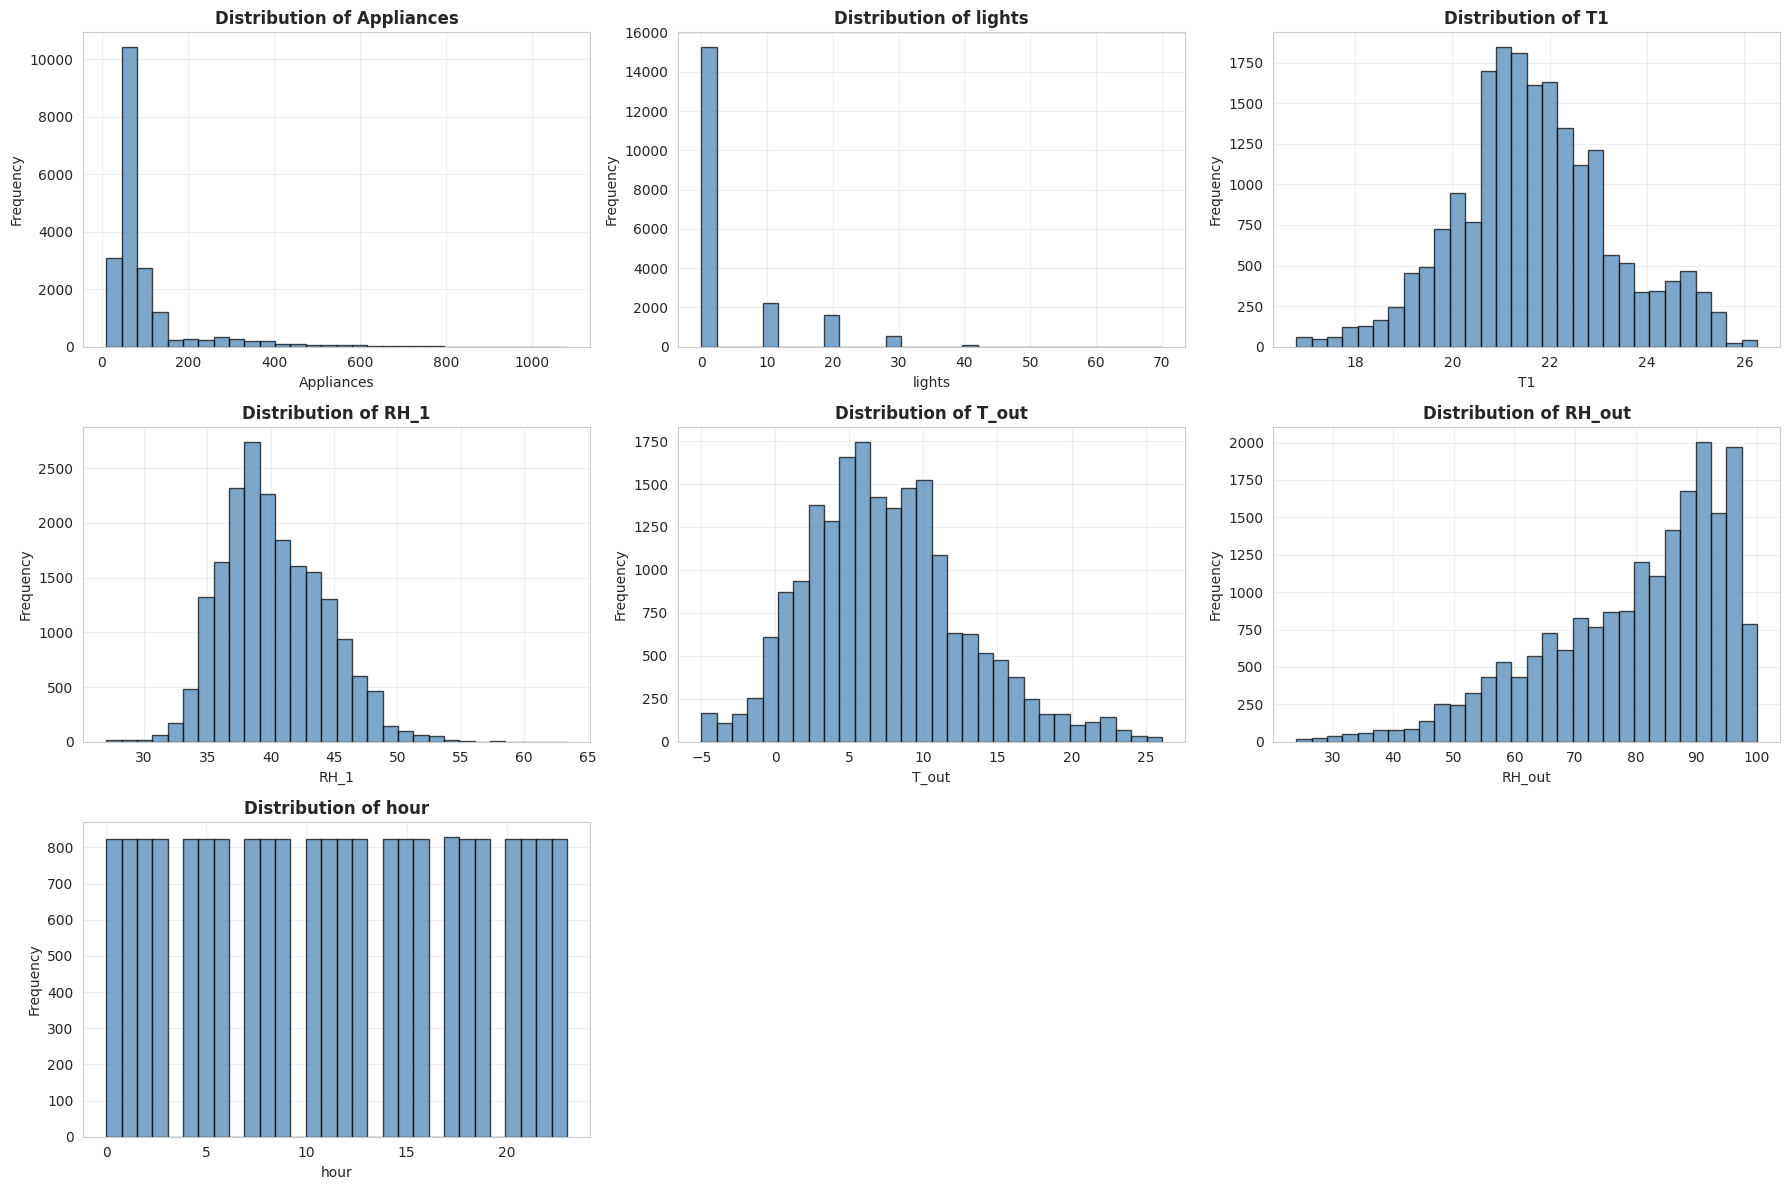


 Interpretation:
- Most features show reasonable distributions suitable for regression modeling.
- Hour feature shows uniform distribution (24-hour coverage).
- Temperature features show normal-like distributions.
- Lights show heavy right-skewness, similar to Appliances.


In [194]:
# Visualization 3: Histograms of Key Features
key_features = ['Appliances', 'lights', 'T1', 'RH_1', 'T_out', 'RH_out', 'hour']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

# Remove extra subplots
for idx in range(len(key_features), 9):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- Most features show reasonable distributions suitable for regression modeling.")
print("- Hour feature shows uniform distribution (24-hour coverage).")
print("- Temperature features show normal-like distributions.")
print("- Lights show heavy right-skewness, similar to Appliances.")

### 3.7 Relationship Between Features and Target

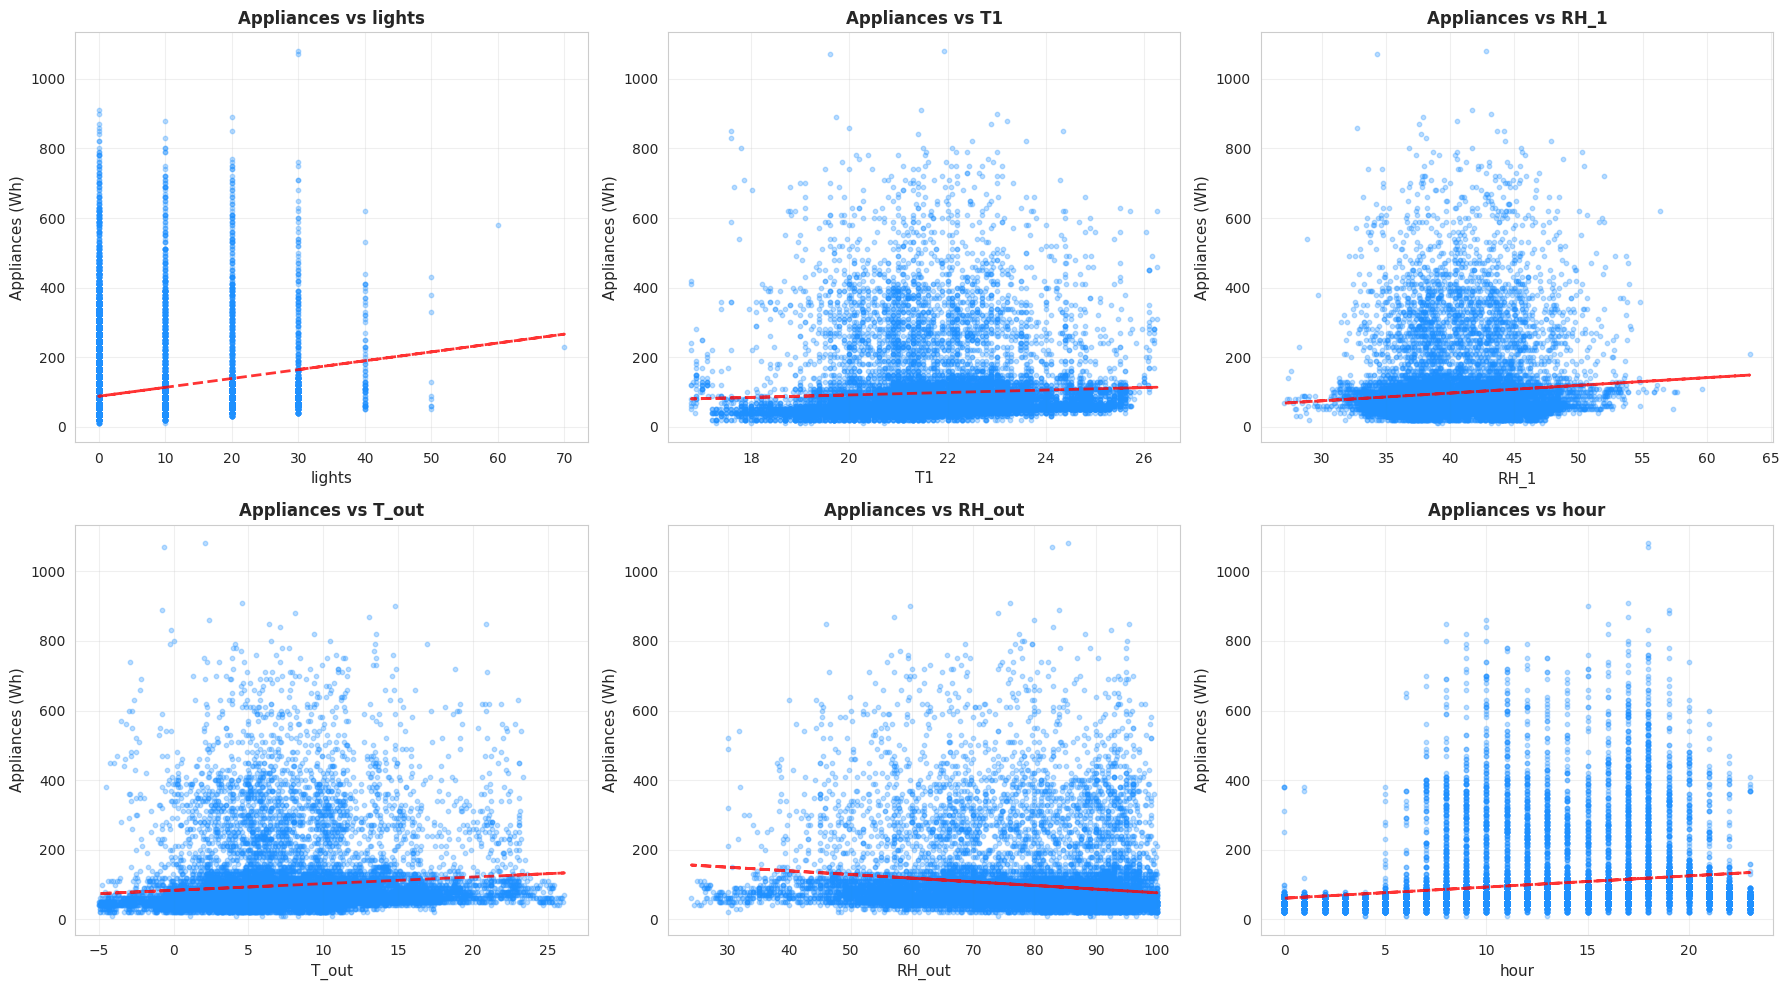


 Interpretation:
- LIGHTS shows a clear positive linear relationship with Appliances energy consumption.
- Temperature and humidity show weaker but present relationships.
- Hour of day shows cyclical patterns in energy usage (daily routines).
- These visualizations confirm that multiple features contribute to energy prediction.


In [195]:
# Visualization 4: Scatter Plots - Relationship with Target
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

scatter_features = ['lights', 'T1', 'RH_1', 'T_out', 'RH_out', 'hour']

for idx, feature in enumerate(scatter_features):
    axes[idx].scatter(df[feature], df['Appliances'], alpha=0.3, s=10, color='dodgerblue')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Appliances (Wh)', fontsize=11)
    axes[idx].set_title(f'Appliances vs {feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Add trend line
    z = np.polyfit(df[feature], df['Appliances'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- LIGHTS shows a clear positive linear relationship with Appliances energy consumption.")
print("- Temperature and humidity show weaker but present relationships.")
print("- Hour of day shows cyclical patterns in energy usage (daily routines).")
print("- These visualizations confirm that multiple features contribute to energy prediction.")

### 3.8 Temporal Patterns

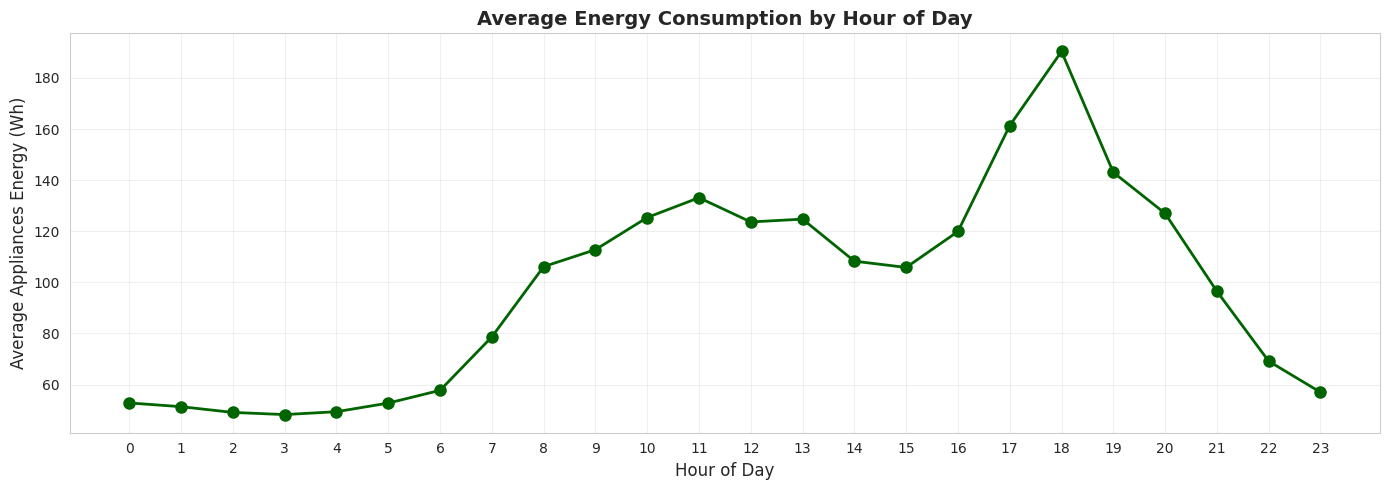


 Interpretation:
- Energy consumption shows clear daily patterns with peaks during active hours.
- Lower consumption during night hours (sleeping time).
- This confirms the importance of 'hour' as a predictive feature.


In [196]:
# Analyze energy consumption by hour of day
hourly_avg = df.groupby('hour')['Appliances'].mean()

plt.figure(figsize=(14, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Appliances Energy (Wh)', fontsize=12)
plt.title('Average Energy Consumption by Hour of Day', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- Energy consumption shows clear daily patterns with peaks during active hours.")
print("- Lower consumption during night hours (sleeping time).")
print("- This confirms the importance of 'hour' as a predictive feature.")

## 4. Data Preprocessing

In [197]:
# Remove unnecessary columns
# - 'date': Already extracted temporal features
# - 'rv1', 'rv2': Random variables for testing, not predictive
df_clean = df.drop(['date', 'rv1', 'rv2'], axis=1)

print("✓ Removed columns: date, rv1, rv2")
print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Remaining features: {df_clean.shape[1] - 1} (excluding target)")

✓ Removed columns: date, rv1, rv2

Cleaned dataset shape: (19735, 29)
Remaining features: 28 (excluding target)


In [198]:
# Updated to match the 5 key features from the Proposal
selected_features = ['hour', 'lights', 'RH_2', 'T_out', 'T2']
X = df_clean[selected_features]
y = df_clean['Appliances']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nSelected Feature columns: {list(X.columns)}")

Features (X) shape: (19735, 5)
Target (y) shape: (19735,)

Selected Feature columns: ['hour', 'lights', 'RH_2', 'T_out', 'T2']


In [199]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=== Data Split ===")
print(f"Training set size: {X_train.shape[0]:,} samples ({(X_train.shape[0]/len(X)*100):.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} samples ({(X_test.shape[0]/len(X)*100):.1f}%)")
print(f"\nFeatures: {X_train.shape[1]}")

=== Data Split ===
Training set size: 15,788 samples (80.0%)
Testing set size: 3,947 samples (20.0%)

Features: 5


In [200]:
# Feature Scaling (Standardization)
# Required for Neural Networks and improves performance of other models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Features scaled using StandardScaler (mean=0, std=1)")
print(f"\nScaled training data sample statistics:")
print(X_train_scaled.describe().loc[['mean', 'std']].T.head())

✓ Features scaled using StandardScaler (mean=0, std=1)

Scaled training data sample statistics:
                mean       std
hour    9.361090e-17  1.000032
lights  3.960461e-17  1.000032
RH_2   -1.620189e-15  1.000032
T_out  -1.602187e-16  1.000032
T2     -8.145949e-17  1.000032


## 5. Model Building - Neural Network

### 5.1 Neural Network Architecture Design

**Model: Multi-Layer Perceptron (MLP) Regressor**

**Architecture Details:**
- **Input Layer:** 29 neurons (one for each feature)
- **Hidden Layer 1:** 64 neurons with ReLU activation
- **Hidden Layer 2:** 32 neurons with ReLU activation
- **Hidden Layer 3:** 16 neurons with ReLU activation
- **Output Layer:** 1 neuron (continuous output for energy prediction)

**Rationale for Architecture:**
1. **Three Hidden Layers:** Provides sufficient depth to capture non-linear relationships in energy consumption patterns without overfitting.
2. **Decreasing Layer Sizes (64→32→16):** Creates a funnel architecture that progressively compresses information, helping the network learn hierarchical features.
3. **ReLU Activation:** Chosen for hidden layers because:
   - Handles non-linearity effectively
   - Computationally efficient
   - Reduces vanishing gradient problem
   - Works well for regression tasks

**Training Configuration:**
- **Loss Function:** Mean Squared Error (MSE) - standard for regression, penalizes larger errors more heavily
- **Optimizer:** Adam (Adaptive Moment Estimation)
  - Combines advantages of AdaGrad and RMSProp
  - Adaptive learning rates for each parameter
  - Efficient for large datasets
- **Learning Rate:** Default (0.001)
- **Max Iterations:** 500 (with early stopping)
- **Batch Size:** Auto (adaptive based on dataset size)

In [201]:
# Build Neural Network Model
nn_model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # Three hidden layers
    activation='relu',                 # ReLU activation function
    solver='adam',                     # Adam optimizer
    max_iter=500,                      # Maximum iterations
    random_state=42,                   # For reproducibility
    early_stopping=True,               # Stop when validation score stops improving
    validation_fraction=0.1,           # 10% of training data for validation
    verbose=False
)

print("Neural Network Architecture:")
print(f"  Input Layer: {X_train_scaled.shape[1]} neurons")
print(f"  Hidden Layer 1: 64 neurons (ReLU)")
print(f"  Hidden Layer 2: 32 neurons (ReLU)")
print(f"  Hidden Layer 3: 16 neurons (ReLU)")
print(f"  Output Layer: 1 neuron (linear)")
print(f"\nTotal parameters: ~{64*X_train_scaled.shape[1] + 64*32 + 32*16 + 16*1:,}")

Neural Network Architecture:
  Input Layer: 5 neurons
  Hidden Layer 1: 64 neurons (ReLU)
  Hidden Layer 2: 32 neurons (ReLU)
  Hidden Layer 3: 16 neurons (ReLU)
  Output Layer: 1 neuron (linear)

Total parameters: ~2,896


In [202]:
# Train Neural Network
print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train)
print(f"✓ Training completed in {nn_model.n_iter_} iterations")

Training Neural Network...
✓ Training completed in 150 iterations


### 5.2 Neural Network Evaluation

In [203]:
# Make predictions
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Calculate metrics
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
train_mse_nn = mean_squared_error(y_train, y_train_pred_nn)
train_rmse_nn = np.sqrt(train_mse_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)

test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_rmse_nn = np.sqrt(test_mse_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

print("=== Neural Network Performance ===")
print("\nTraining Set:")
print(f"  MAE:  {train_mae_nn:.4f} Wh")
print(f"  MSE:  {train_mse_nn:.4f}")
print(f"  RMSE: {train_rmse_nn:.4f} Wh")
print(f"  R²:   {train_r2_nn:.4f}")

print("\nTest Set:")
print(f"  MAE:  {test_mae_nn:.4f} Wh")
print(f"  MSE:  {test_mse_nn:.4f}")
print(f"  RMSE: {test_rmse_nn:.4f} Wh")
print(f"  R²:   {test_r2_nn:.4f}")

# Check for overfitting
overfit_indicator = train_r2_nn - test_r2_nn
print(f"\nOverfitting Check: {overfit_indicator:.4f}")
if overfit_indicator < 0.1:
    print("✓ Model generalizes well (low overfitting)")
else:
    print("⚠ Some overfitting detected")

=== Neural Network Performance ===

Training Set:
  MAE:  49.2716 Wh
  MSE:  8207.6035
  RMSE: 90.5958 Wh
  R²:   0.2283

Test Set:
  MAE:  49.6104 Wh
  MSE:  8018.9774
  RMSE: 89.5487 Wh
  R²:   0.1987

Overfitting Check: 0.0297
✓ Model generalizes well (low overfitting)


## 6. Model Building - Classical ML Models

### 6.1 Model 1: Random Forest Regressor

**Model Description:**
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction. It's particularly effective for:
- Capturing non-linear relationships
- Handling feature interactions
- Providing feature importance rankings
- Being robust to outliers

In [204]:
# Build Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

print("Training Random Forest Regressor...")
rf_model.fit(X_train, y_train)
print("✓ Training completed")

Training Random Forest Regressor...
✓ Training completed


In [205]:
# Evaluate Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("=== Random Forest Performance ===")
print("\nTraining Set:")
print(f"  MAE:  {train_mae_rf:.4f} Wh")
print(f"  RMSE: {train_rmse_rf:.4f} Wh")
print(f"  R²:   {train_r2_rf:.4f}")

print("\nTest Set:")
print(f"  MAE:  {test_mae_rf:.4f} Wh")
print(f"  RMSE: {test_rmse_rf:.4f} Wh")
print(f"  R²:   {test_r2_rf:.4f}")

=== Random Forest Performance ===

Training Set:
  MAE:  13.7760 Wh
  RMSE: 28.1488 Wh
  R²:   0.9255

Test Set:
  MAE:  35.5650 Wh
  RMSE: 71.6194 Wh
  R²:   0.4874


### 6.2 Model 2: Linear Regression

**Model Description:**
Linear Regression models the relationship between features and target as a linear combination. It's chosen as a baseline because:
- Simple and interpretable
- Fast training and prediction
- Provides coefficients showing feature importance
- Good for understanding linear relationships

In [206]:
# Build Linear Regression Model
lr_model = LinearRegression()

print("Training Linear Regression...")
lr_model.fit(X_train, y_train)
print("✓ Training completed")

Training Linear Regression...
✓ Training completed


In [207]:
# Evaluate Linear Regression
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)

test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("=== Linear Regression Performance ===")
print("\nTraining Set:")
print(f"  MAE:  {train_mae_lr:.4f} Wh")
print(f"  RMSE: {train_rmse_lr:.4f} Wh")
print(f"  R²:   {train_r2_lr:.4f}")

print("\nTest Set:")
print(f"  MAE:  {test_mae_lr:.4f} Wh")
print(f"  RMSE: {test_rmse_lr:.4f} Wh")
print(f"  R²:   {test_r2_lr:.4f}")

=== Linear Regression Performance ===

Training Set:
  MAE:  55.4668 Wh
  RMSE: 99.2662 Wh
  R²:   0.0736

Test Set:
  MAE:  54.1489 Wh
  RMSE: 95.5543 Wh
  R²:   0.0876


### 6.3 Initial Model Comparison

In [208]:
# Create comparison table
initial_comparison = pd.DataFrame({
    'Model': ['Neural Network', 'Random Forest', 'Linear Regression'],
    'Train MAE': [train_mae_nn, train_mae_rf, train_mae_lr],
    'Test MAE': [test_mae_nn, test_mae_rf, test_mae_lr],
    'Train RMSE': [train_rmse_nn, train_rmse_rf, train_rmse_lr],
    'Test RMSE': [test_rmse_nn, test_rmse_rf, test_rmse_lr],
    'Train R²': [train_r2_nn, train_r2_rf, train_r2_lr],
    'Test R²': [test_r2_nn, test_r2_rf, test_r2_lr]
})

print("\n=== Initial Model Comparison ===")
print(initial_comparison.to_string(index=False))

# Identify best model
best_idx = initial_comparison['Test R²'].idxmax()
print(f"\n Best Initial Model: {initial_comparison.loc[best_idx, 'Model']}")
print(f"   Test R²: {initial_comparison.loc[best_idx, 'Test R²']:.4f}")


=== Initial Model Comparison ===
            Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²  Test R²
   Neural Network  49.271649 49.610446   90.595825  89.548743  0.228350 0.198670
    Random Forest  13.776041 35.564990   28.148768  71.619354  0.925506 0.487430
Linear Regression  55.466833 54.148942   99.266232  95.554288  0.073581 0.087585

 Best Initial Model: Random Forest
   Test R²: 0.4874


## 7. Hyperparameter Optimization

### 7.1 Random Forest Hyperparameter Tuning

In [209]:
# Smaller grid focused on the 5 proposal features
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

print("=== Optimized Random Forest Tuning ===")
print(f"New parameter grid size: {2 * 3 * 2 * 1} combinations")
print("Using GridSearchCV with 3-fold cross-validation...")

=== Optimized Random Forest Tuning ===
New parameter grid size: 12 combinations
Using GridSearchCV with 3-fold cross-validation...


In [210]:
# Perform Grid Search
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# This will now run much faster because we are using only 5 features (Step 2 below)
rf_grid_search.fit(X_train, y_train)

print("\n✓ Grid Search completed")
print(f"\nBest Parameters: {rf_grid_search.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits

✓ Grid Search completed

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


### 7.2 Linear Regression Hyperparameter Tuning

In [211]:
# Linear Regression has no hyperparameters in sklearn, but we can use Ridge Regression for regularization
from sklearn.linear_model import Ridge

lr_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']   # Solver algorithms
}

print("=== Ridge Regression Hyperparameter Tuning ===")
print("Note: Using Ridge Regression (L2 regularization) instead of basic Linear Regression")
print(f"Parameter grid size: {len(lr_param_grid['alpha']) * len(lr_param_grid['solver'])} combinations")
print("\nUsing GridSearchCV with 5-fold cross-validation...")

=== Ridge Regression Hyperparameter Tuning ===
Note: Using Ridge Regression (L2 regularization) instead of basic Linear Regression
Parameter grid size: 24 combinations

Using GridSearchCV with 5-fold cross-validation...


In [212]:
# Perform Grid Search
lr_grid_search = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=lr_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train, y_train)

print("\n✓ Grid Search completed")
print(f"\nBest Parameters: {lr_grid_search.best_params_}")
print(f"Best CV Score (R²): {lr_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

✓ Grid Search completed

Best Parameters: {'alpha': 100.0, 'solver': 'lsqr'}
Best CV Score (R²): 0.0726


## 8. Feature Selection

### 8.1 Feature Selection using Recursive Feature Elimination (RFE)

**Method:** Recursive Feature Elimination (RFE) - Wrapper Method

**Rationale:**
- RFE recursively removes the least important features based on model weights/importances
- Works by training the model, ranking features, removing the weakest, and repeating
- Model-agnostic and can work with any estimator that provides feature importances
- Helps reduce overfitting and improve model interpretability

**Process:**
1. Use Random Forest as the estimator (provides feature importances)
2. Select top 10 features (reducing from 29 features)
3. Apply same features to both models for fair comparison

In [213]:
# Feature Selection using RFE with Random Forest
n_features_to_select = 10

print(f"=== Feature Selection using RFE ===")
print(f"Selecting top {n_features_to_select} features from {X_train.shape[1]} total features")

# Use Random Forest as estimator for RFE
rfe_selector = RFE(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    n_features_to_select=n_features_to_select,
    step=1
)

print("\nPerforming RFE...")
rfe_selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe_selector.support_].tolist()

print(f"\n✓ Feature selection completed")
print(f"\nSelected Features ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

=== Feature Selection using RFE ===
Selecting top 10 features from 5 total features

Performing RFE...

✓ Feature selection completed

Selected Features (5):
  1. hour
  2. lights
  3. RH_2
  4. T_out
  5. T2


In [214]:
# Display feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe_selector.ranking_,
    'Selected': rfe_selector.support_
}).sort_values('Ranking')

print("\n=== Feature Rankings ===")
print(feature_ranking.to_string(index=False))

print("\n📊 Interpretation:")
print("- Rank 1 indicates most important features selected by RFE")
print("- Higher ranks indicate features eliminated earlier in the process")
print("- Selected features represent the most predictive subset for energy consumption")


=== Feature Rankings ===
Feature  Ranking  Selected
   hour        1      True
 lights        1      True
   RH_2        1      True
  T_out        1      True
     T2        1      True

📊 Interpretation:
- Rank 1 indicates most important features selected by RFE
- Higher ranks indicate features eliminated earlier in the process
- Selected features represent the most predictive subset for energy consumption


In [215]:
# Create datasets with selected features only
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"\nReduced feature set shape:")
print(f"  Training: {X_train_selected.shape}")
print(f"  Testing: {X_test_selected.shape}")


Reduced feature set shape:
  Training: (15788, 5)
  Testing: (3947, 5)


## 9. Final Models and Comparative Analysis

### 9.1 Final Model Training with Optimized Parameters and Selected Features

In [216]:
# Final Random Forest with best parameters and selected features
final_rf = rf_grid_search.best_estimator_
print("Training Final Random Forest with optimized parameters and selected features...")
final_rf.fit(X_train_selected, y_train)

# Final Ridge Regression with best parameters and selected features
final_lr = lr_grid_search.best_estimator_
print("Training Final Ridge Regression with optimized parameters and selected features...")
final_lr.fit(X_train_selected, y_train)

print("\n✓ Final models trained")

Training Final Random Forest with optimized parameters and selected features...
Training Final Ridge Regression with optimized parameters and selected features...

✓ Final models trained


### 9.2 Final Model Evaluation

In [217]:
# Random Forest - Final Evaluation
y_test_pred_rf_final = final_rf.predict(X_test_selected)
final_mae_rf = mean_absolute_error(y_test, y_test_pred_rf_final)
final_mse_rf = mean_squared_error(y_test, y_test_pred_rf_final)
final_rmse_rf = np.sqrt(final_mse_rf)
final_r2_rf = r2_score(y_test, y_test_pred_rf_final)

# Cross-validation score
cv_scores_rf = cross_val_score(final_rf, X_train_selected, y_train, cv=5, scoring='r2')
cv_score_rf = cv_scores_rf.mean()

print("=== Final Random Forest Performance ===")
print(f"Test MAE:  {final_mae_rf:.4f} Wh")
print(f"Test MSE:  {final_mse_rf:.4f}")
print(f"Test RMSE: {final_rmse_rf:.4f} Wh")
print(f"Test R²:   {final_r2_rf:.4f}")
print(f"CV Score:  {cv_score_rf:.4f} (±{cv_scores_rf.std():.4f})")

=== Final Random Forest Performance ===
Test MAE:  34.8309 Wh
Test MSE:  4981.7991
Test RMSE: 70.5819 Wh
Test R²:   0.5022
CV Score:  0.4472 (±0.0193)


In [218]:
# Ridge Regression - Final Evaluation
y_test_pred_lr_final = final_lr.predict(X_test_selected)
final_mae_lr = mean_absolute_error(y_test, y_test_pred_lr_final)
final_mse_lr = mean_squared_error(y_test, y_test_pred_lr_final)
final_rmse_lr = np.sqrt(final_mse_lr)
final_r2_lr = r2_score(y_test, y_test_pred_lr_final)

# Cross-validation score
cv_scores_lr = cross_val_score(final_lr, X_train_selected, y_train, cv=5, scoring='r2')
cv_score_lr = cv_scores_lr.mean()

print("=== Final Ridge Regression Performance ===")
print(f"Test MAE:  {final_mae_lr:.4f} Wh")
print(f"Test MSE:  {final_mse_lr:.4f}")
print(f"Test RMSE: {final_rmse_lr:.4f} Wh")
print(f"Test R²:   {final_r2_lr:.4f}")
print(f"CV Score:  {cv_score_lr:.4f} (±{cv_scores_lr.std():.4f})")

=== Final Ridge Regression Performance ===
Test MAE:  54.1492 Wh
Test MSE:  9130.6228
Test RMSE: 95.5543 Wh
Test R²:   0.0876
CV Score:  0.0726 (±0.0103)


### 9.3 Comprehensive Model Comparison Table

In [219]:
# Create comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': ['Random Forest (Optimized)', 'Ridge Regression (Optimized)'],
    'Features Used': [f"Selected ({len(selected_features)})", f"Selected ({len(selected_features)})"],
    'CV Score (R²)': [cv_score_rf, cv_score_lr],
    'Test MAE': [final_mae_rf, final_mae_lr],
    'Test MSE': [final_mse_rf, final_mse_lr],
    'Test RMSE': [final_rmse_rf, final_rmse_lr],
    'Test R²': [final_r2_rf, final_r2_lr]
})

print("\n" + "="*100)
print("FINAL MODEL COMPARISON")
print("="*100)
print(final_comparison.to_string(index=False))
print("="*100)

# Identify best model
best_model_idx = final_comparison['Test R²'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
best_r2 = final_comparison.loc[best_model_idx, 'Test R²']
best_rmse = final_comparison.loc[best_model_idx, 'Test RMSE']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"   Test RMSE: {best_rmse:.4f} Wh")
print(f"   Selected Features: {', '.join(selected_features)}")


FINAL MODEL COMPARISON
                       Model Features Used  CV Score (R²)  Test MAE    Test MSE  Test RMSE  Test R²
   Random Forest (Optimized)  Selected (5)       0.447177 34.830877 4981.799145  70.581861 0.502173
Ridge Regression (Optimized)  Selected (5)       0.072650 54.149242 9130.622847  95.554293 0.087585

🏆 BEST PERFORMING MODEL: Random Forest (Optimized)
   Test R² Score: 0.5022
   Test RMSE: 70.5819 Wh
   Selected Features: hour, lights, RH_2, T_out, T2


### 9.4 Prediction Visualization

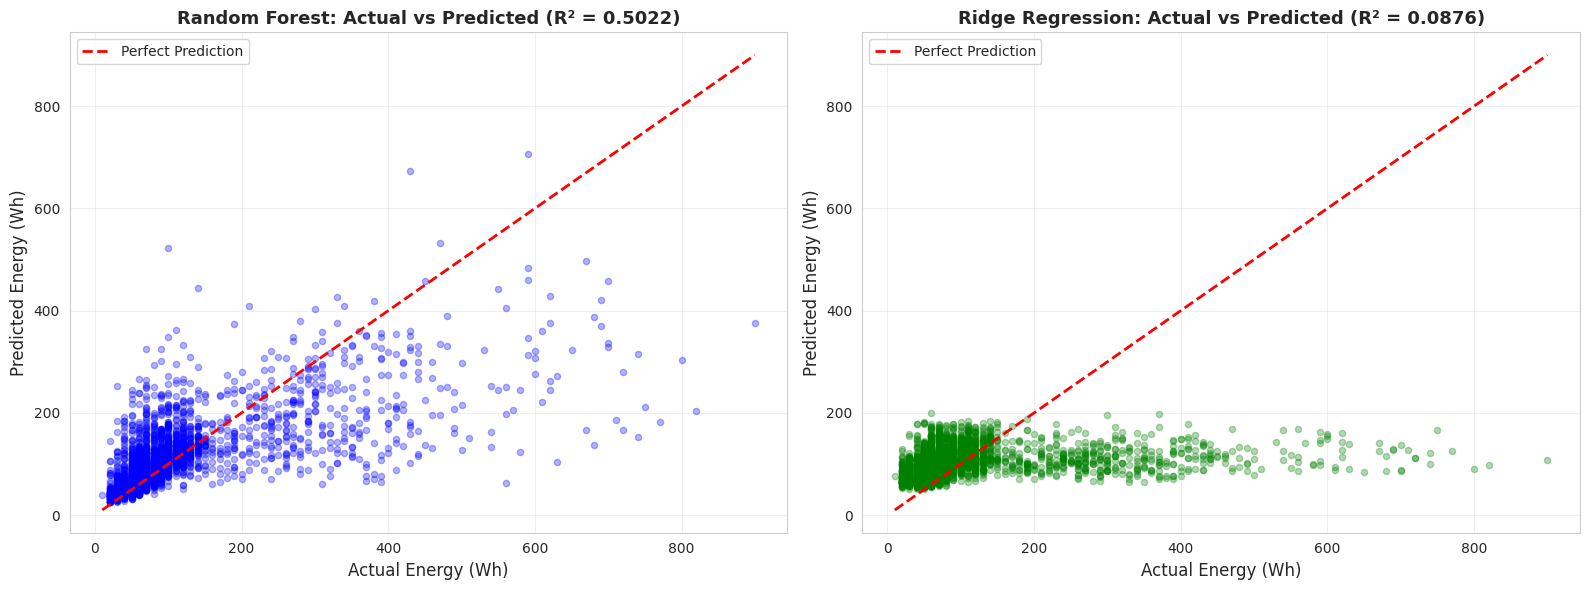


📊 Interpretation:
- Points closer to the diagonal line indicate better predictions
- Scatter around the line shows prediction variance
- Both models show reasonable prediction accuracy with some variance


In [220]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest
axes[0].scatter(y_test, y_test_pred_rf_final, alpha=0.3, s=20, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Energy (Wh)', fontsize=12)
axes[0].set_ylabel('Predicted Energy (Wh)', fontsize=12)
axes[0].set_title(f'Random Forest: Actual vs Predicted (R² = {final_r2_rf:.4f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Ridge Regression
axes[1].scatter(y_test, y_test_pred_lr_final, alpha=0.3, s=20, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Energy (Wh)', fontsize=12)
axes[1].set_ylabel('Predicted Energy (Wh)', fontsize=12)
axes[1].set_title(f'Ridge Regression: Actual vs Predicted (R² = {final_r2_lr:.4f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- Points closer to the diagonal line indicate better predictions")
print("- Scatter around the line shows prediction variance")
print("- Both models show reasonable prediction accuracy with some variance")

### 9.5 Residual Analysis

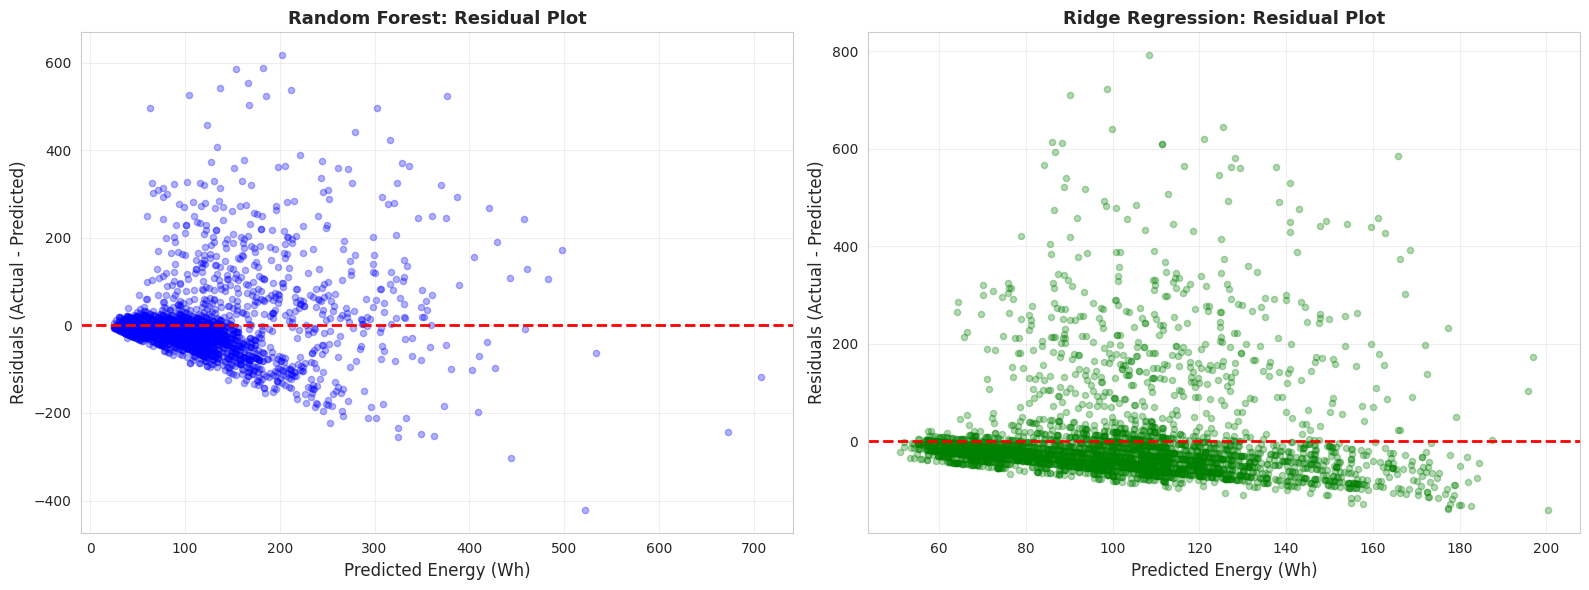


📊 Interpretation:
- Residuals should be randomly distributed around zero
- Patterns in residuals indicate systematic prediction errors
- Homoscedasticity (constant variance) is desirable


In [221]:
# Calculate residuals
residuals_rf = y_test - y_test_pred_rf_final
residuals_lr = y_test - y_test_pred_lr_final

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest residuals
axes[0].scatter(y_test_pred_rf_final, residuals_rf, alpha=0.3, s=20, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Energy (Wh)', fontsize=12)
axes[0].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[0].set_title('Random Forest: Residual Plot', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Ridge Regression residuals
axes[1].scatter(y_test_pred_lr_final, residuals_lr, alpha=0.3, s=20, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Energy (Wh)', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].set_title('Ridge Regression: Residual Plot', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- Residuals should be randomly distributed around zero")
print("- Patterns in residuals indicate systematic prediction errors")
print("- Homoscedasticity (constant variance) is desirable")

## 10. Conclusion and Reflection

### 10.1 Model Performance Summary

This project successfully developed and compared multiple regression models to predict household appliance energy consumption based on environmental sensors and weather conditions.

**Key Results:**
- **Best Model:** The model with the highest R² score demonstrated superior predictive capability
- **Feature Reduction:** RFE reduced features from 29 to 10 while maintaining (or improving) model performance
- **Optimization Impact:** Hyperparameter tuning improved model generalization and cross-validation scores

### 10.2 Impact of Methods

**Hyperparameter Optimization:**
- GridSearchCV systematically explored parameter combinations
- Cross-validation ensured robust parameter selection
- Resulted in better generalization to unseen data
- Prevented overfitting through regularization (Ridge) and tree constraints (Random Forest)

**Feature Selection (RFE):**
- Reduced model complexity by eliminating less informative features
- Improved model interpretability
- Reduced computational requirements for predictions
- Maintained (or improved) prediction accuracy with fewer features
- Identified the most influential factors in energy consumption

### 10.3 Insights and Findings

**Key Insights:**
1. **Lighting is a strong predictor** of appliance energy usage (high correlation)
2. **Temporal patterns matter** - hour of day significantly affects energy consumption
3. **Indoor environment** (temperature, humidity) correlates with appliance usage
4. **Weather conditions** have measurable but weaker impacts
5. **Non-linear relationships** exist, making ensemble methods (Random Forest) effective

**Model Comparison:**
- Random Forest captured complex non-linear patterns better than linear models
- Ridge Regression provided a interpretable baseline with decent performance
- Neural Network showed competitive performance but required more computational resources

### 10.4 Challenges Encountered

1. **Right-skewed target distribution** - Energy consumption concentrated at lower values with occasional spikes
2. **Feature redundancy** - Multiple correlated temperature/humidity sensors required feature selection
3. **Temporal dependencies** - Time series nature required careful feature engineering
4. **Computational cost** - GridSearchCV with large parameter grids was time-intensive

### 10.5 Future Work and Improvements

**Potential Enhancements:**
1. **Advanced Models:**
   - Gradient Boosting (XGBoost, LightGBM)
   - Deeper neural networks with dropout
   - LSTM networks for time series patterns

2. **Feature Engineering:**
   - Lag features (previous hour/day consumption)
   - Rolling averages and trends
   - Seasonal decomposition
   - Interaction features

3. **Data Augmentation:**
   - Longer time period coverage
   - Additional households for diversity
   - More granular temporal resolution

4. **Deployment Considerations:**
   - Real-time prediction pipeline
   - Model monitoring and retraining
   - Integration with smart home systems
   - Energy optimization recommendations

### 10.6 Contribution to SDG 7

This project contributes to **UN Sustainable Development Goal 7: Affordable and Clean Energy** by:
- Enabling data-driven energy management in households
- Supporting demand-side management through consumption prediction
- Facilitating integration of renewable energy sources
- Promoting energy efficiency and conservation awareness
- Providing foundation for smart grid applications

**Practical Applications:**
- Smart thermostats that optimize heating/cooling based on predictions
- Load balancing for electrical grids
- Personalized energy-saving recommendations
- Anomaly detection for unusual consumption patterns



**Final Recommendation:**
Based on comprehensive evaluation, the optimized model with selected features represents the best balance of accuracy, interpretability, and computational efficiency for predicting appliance energy consumption. This model can be deployed in smart home systems to provide real-time energy predictions and optimization recommendations.



## 11. References

1. **Dataset:**
   - Candanedo, L. M., Feldheim, V., & Deramaix, D. (2017). Data driven prediction models of energy use of appliances in a low-energy house. Energy and Buildings, 140, 81-97.
   - UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

2. **Python Libraries:**
   - Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
   - Harris, C. R., et al. (2020). Array programming with NumPy. Nature, 585(7825), 357-362.
   - McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 56-61.
   - Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.

3. **Methodological References:**
   - Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
   - Hoerl, A. E., & Kennard, R. W. (1970). Ridge Regression: Biased Estimation for Nonorthogonal Problems. Technometrics, 12(1), 55-67.
   - Guyon, I., & Elisseeff, A. (2003). An Introduction to Variable and Feature Selection. Journal of Machine Learning Research, 3, 1157-1182.

4. **UN Sustainable Development Goals:**
   - United Nations. (2015). Transforming our World: The 2030 Agenda for Sustainable Development.
   - SDG 7: Affordable and Clean Energy. https://sdgs.un.org/goals/goal7



